# Notebook for working out analysis methods on bursts

## Imports

In [9]:
import os 
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal

from mosquito.util import idx_by_thresh, butter_highpass_filter
from mosquito.process_abf import load_processed_data
from mosquito.analyze_bursts import detect_burst_peaks


## Params

In [2]:
plt.style.use('dark_background')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels


## Load data

In [3]:
# paths to data
data_root = '/media/sam/SamData/Mosquitoes'
data_folder = '22_20240516'  # '17_20240507' # '05_20240322'  #'08_20240401' # '04_20240321' #   '05_20240322'  # '03_20240319' # 
axo_num = 12
# vid_str = 'aedes_C001H001S0001_20240326_154951'
data = load_processed_data(data_folder, axo_num)


In [4]:
# read out data 
t = data['time']  
emg_filt = data['emg_filt']
emg = data['emg']
spike_idx = data['spike_idx']
mic_phase = data['mic_phase'] 
mic_filt = data['mic_filt']
wbf = data['wbf'] 

window = round(data['params']['emg_window']/2)
fs = data['sampling_freq']

## Get burst peaks

In [5]:
# rename variable and use function to get burst peaks
burst_idx = spike_idx
burst_peak_idx = list()
burst_df_list = list()

for idx in burst_idx:
    peaks, peaks_df = detect_burst_peaks(emg, t, idx)
    burst_peak_idx.append(peaks)
    burst_df_list.append(peaks_df)

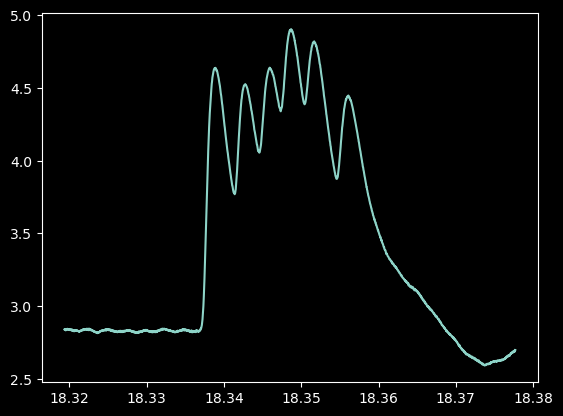

In [6]:
# test this approach
fig, ax = plt.subplots()

burst_ind = 30

idx_range = np.arange(burst_idx[burst_ind] - window, burst_idx[burst_ind] + window)
ax.plot(t[idx_range], emg[idx_range])
# ax.plot(t[burst_peak_idx[burst_ind]], emg[burst_peak_idx[burst_ind]], 'rx')

In [10]:
burst_df = pd.concat(burst_df_list, ignore_index=True)

In [11]:
burst_df

,burst_idx,spike_idx,spike_t,spike_dt,spike_num,spike_height,spike_left_height
0,6071,5736,0.163479,0.000000,0,4.518738,4.518738
1,6071,5875,0.167441,0.003962,1,4.346619,0.700684
2,6071,5980,0.170433,0.006954,2,4.640198,0.656128
3,6071,6086,0.173455,0.009975,3,4.786987,0.566711
4,6071,6195,0.176561,0.013082,4,4.846802,0.495911
...,...,...,...,...,...,...,...
1308,4330491,4330321,123.416679,0.003933,1,4.225769,0.693054
1309,4330491,4330421,123.419529,0.006783,2,4.377747,0.540466
1310,4330491,4330516,123.422236,0.009491,3,4.572144,0.524292
1311,4330491,4330618,123.425143,0.012398,4,4.541931,0.393372
